In [41]:
!pip install twitterscraper
!pip install wordcloud

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import nltk
from nltk import bigrams 
import  datetime as dt
from collections import Counter 
%matplotlib inline
from twitterscraper import query_tweets
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
#fetching tweet data using twitterscraper
def fetch_tweets():
    list_of_tweets = query_tweets("#DateMyFamilyZambia", 1000, begindate=dt.date(2019, 1, 1), enddate=dt.date(2019,4,15))
    tweets_dicts=[]
    for tweet in list_of_tweets:
        tweetObj={'likes':tweet.likes,'replies':tweet.replies,'text':tweet.text,'user':tweet.user,'timestamp':tweet.timestamp,'retweets':tweet.retweets}
        tweets_dicts.append(tweetObj)
    df = pd.DataFrame(tweets_dicts)
    return df


df=fetch_tweets()
writer = pd.ExcelWriter('DateMyFamilyZambia.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

INFO: queries: ['#DateMyFamilyZambia since:2019-01-01 until:2019-01-06', '#DateMyFamilyZambia since:2019-01-06 until:2019-01-11', '#DateMyFamilyZambia since:2019-01-11 until:2019-01-16', '#DateMyFamilyZambia since:2019-01-16 until:2019-01-21', '#DateMyFamilyZambia since:2019-01-21 until:2019-01-27', '#DateMyFamilyZambia since:2019-01-27 until:2019-02-01', '#DateMyFamilyZambia since:2019-02-01 until:2019-02-06', '#DateMyFamilyZambia since:2019-02-06 until:2019-02-11', '#DateMyFamilyZambia since:2019-02-11 until:2019-02-16', '#DateMyFamilyZambia since:2019-02-16 until:2019-02-22', '#DateMyFamilyZambia since:2019-02-22 until:2019-02-27', '#DateMyFamilyZambia since:2019-02-27 until:2019-03-04', '#DateMyFamilyZambia since:2019-03-04 until:2019-03-09', '#DateMyFamilyZambia since:2019-03-09 until:2019-03-14', '#DateMyFamilyZambia since:2019-03-14 until:2019-03-20', '#DateMyFamilyZambia since:2019-03-20 until:2019-03-25', '#DateMyFamilyZambia since:2019-03-25 until:2019-03-30', '#DateMyFamilyZ

In [36]:
df

,likes,replies,retweets,text,timestamp,user
0,0,0,0,the differences between #datemyfamilyzambia an...,2019-01-09 17:27:47,preciouschanda3
1,2,1,0,She didn’t pick Mwayi?? Whaaaat?!!!! #DateMyFa...,2019-01-06 17:51:08,HoneyJewel9
2,0,0,0,I still can't get over wow wow wow wow ...cute...,2019-01-06 17:13:10,lenganjiposts
3,0,0,0,Catching the repeat of #datemyfamilyZambia,2019-01-05 13:10:44,ToxiqOfficial
4,0,0,0,I am so over #DatemyFamilyZambia.The whole thi...,2019-01-05 11:37:38,Kayjerom
5,0,0,0,So I'm a Mum and I am basically lame and total...,2019-01-05 06:37:56,Idylic_Lonsome
6,0,0,0,"Ba Nathan ati ""you have missed out on a chance...",2019-01-05 06:37:56,Idylic_Lonsome
7,21,1,0,Da awesome @ZhaneChu has finally found somethi...,2019-04-08 15:05:50,RobertoZambia
8,2,0,0,Eish is this how people felt when watching the...,2019-04-06 13:01:00,AnastasiaKasong
9,0,0,0,"""He's not picky....\n\nHe'll go out with anyon...",2019-04-06 12:41:30,JeraZW


In [37]:
#Lets rename df to twdata
twdata=df

In [38]:
#Cleaning data
twdata['time_date']=pd.to_datetime(twdata['timestamp'])
twdata['date'] = [d.date() for d in twdata['time_date']]
twdata['time'] = [d.time() for d in twdata['time_date']]
twdata['hour']= twdata.time_date.dt.hour
twdata

,likes,replies,retweets,text,timestamp,user,time_date,date,time,hour
0,0,0,0,the differences between #datemyfamilyzambia an...,2019-01-09 17:27:47,preciouschanda3,2019-01-09 17:27:47,2019-01-09,17:27:47,17
1,2,1,0,She didn’t pick Mwayi?? Whaaaat?!!!! #DateMyFa...,2019-01-06 17:51:08,HoneyJewel9,2019-01-06 17:51:08,2019-01-06,17:51:08,17
2,0,0,0,I still can't get over wow wow wow wow ...cute...,2019-01-06 17:13:10,lenganjiposts,2019-01-06 17:13:10,2019-01-06,17:13:10,17
3,0,0,0,Catching the repeat of #datemyfamilyZambia,2019-01-05 13:10:44,ToxiqOfficial,2019-01-05 13:10:44,2019-01-05,13:10:44,13
4,0,0,0,I am so over #DatemyFamilyZambia.The whole thi...,2019-01-05 11:37:38,Kayjerom,2019-01-05 11:37:38,2019-01-05,11:37:38,11
5,0,0,0,So I'm a Mum and I am basically lame and total...,2019-01-05 06:37:56,Idylic_Lonsome,2019-01-05 06:37:56,2019-01-05,06:37:56,6
6,0,0,0,"Ba Nathan ati ""you have missed out on a chance...",2019-01-05 06:37:56,Idylic_Lonsome,2019-01-05 06:37:56,2019-01-05,06:37:56,6
7,21,1,0,Da awesome @ZhaneChu has finally found somethi...,2019-04-08 15:05:50,RobertoZambia,2019-04-08 15:05:50,2019-04-08,15:05:50,15
8,2,0,0,Eish is this how people felt when watching the...,2019-04-06 13:01:00,AnastasiaKasong,2019-04-06 13:01:00,2019-04-06,13:01:00,13
9,0,0,0,"""He's not picky....\n\nHe'll go out with anyon...",2019-04-06 12:41:30,JeraZW,2019-04-06 12:41:30,2019-04-06,12:41:30,12


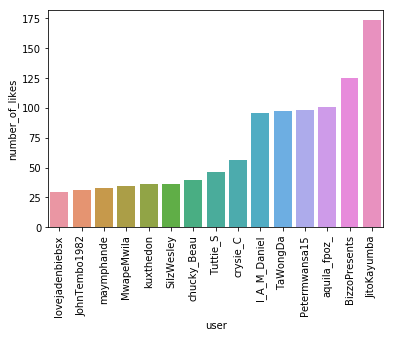

In [33]:
#Finding the most influencial Tweeter
def convert_index_most_liked(tweep_most_likes_df):
    index_list=np.array(tweep_most_likes_df.index)
    tweeps=[]
    for index,user_from_index  in enumerate (index_list):
        total_likes=tweep_most_likes_df['likes'][index]
        likes_per_user={'user':user_from_index,'number_of_likes':total_likes}
        tweeps.append(likes_per_user)
    return tweeps

tweep_group=twdata.groupby('user')
tweep_most_likes=tweep_group['likes'].sum()
tweep_most_likes_df_temp=pd.DataFrame(tweep_most_likes)
tweep_most_likes_df=pd.DataFrame(tweep_most_likes_df_temp['likes'])
temp=convert_index_most_liked(tweep_most_likes_df)
most_likes_df=pd.DataFrame(temp)
most_liked_tweets=most_likes_df.sort_values(by='number_of_likes')

g = sns.barplot(x='user',y='number_of_likes',data=most_liked_tweets.tail(15))
for item in g.get_xticklabels():
    item.set_rotation(90)

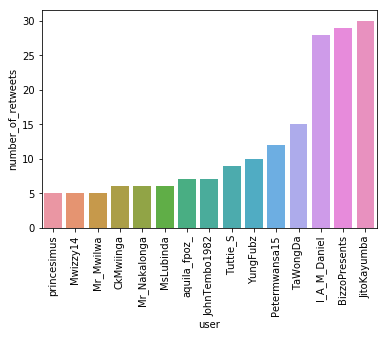

In [27]:
#finding the tweep with the most retweets
most_retweeted_tweeps_sum=twdata.groupby('user')['retweets'].sum()
temp=pd.DataFrame(most_retweeted_tweeps_sum)
                  
def convert_index_most_retweeted(tweep_most_retweeted_df):
    index_list=np.array(tweep_most_likes_df.index)
    tweeps=[]
    for index,user_from_index  in enumerate (index_list):
        total_retweets=tweep_most_retweeted_df['retweets'][index]
        retweets_per_user={'user':user_from_index,'number_of_retweets':total_retweets}
        tweeps.append(retweets_per_user)
    return pd.DataFrame(tweeps)
most_retweeted_tweeps_df=convert_index_most_retweeted(temp)
most_retweeted_tweeps_sorted=most_retweeted_tweeps_df.sort_values(by='number_of_retweets')

#render the bar graph
g=sns.barplot(x='user',y='number_of_retweets',data=most_retweeted_tweeps_sorted.tail(15))
for item in g.get_xticklabels():
    item.set_rotation(90)

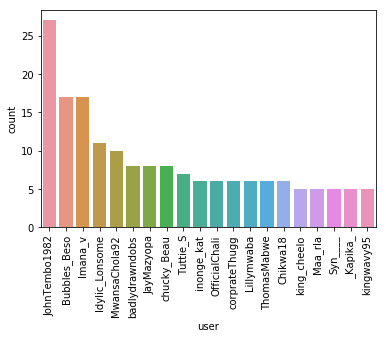

In [16]:
#Who tweeted the Most about the Show?
g=sns.countplot(x='user',data=twdata, order=pd.value_counts(twdata['user']).iloc[:20].index)
for item in g.get_xticklabels():
    item.set_rotation(90)

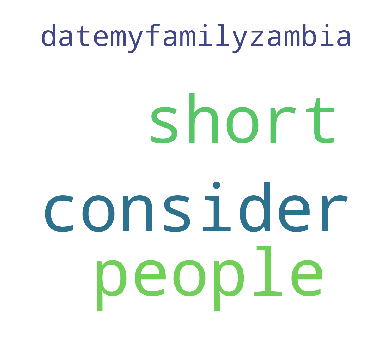

In [39]:
#We will be appending the words to this var
comment_words = ' ' 

#Finds all stop words in the set of tweets.
stopwords = set(STOPWORDS) 

 #convert all tweet content into strings
for val in df.text:
   val = str(val)
#Split all strings into individual components
   tokens = val.split() 
   for i in range(len(tokens)):
#Converts all the individual strings to lower case.
      tokens[i] = tokens[i].lower() 
for words in tokens:
   comment_words = comment_words + words + ' '
wordcloud=WordCloud(width=1000,height=1000, background_color='white', stopwords=stopwords,min_font_size=10).generate(comment_words)

#All of this is a single line
plt.figure(figsize=(5,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [19]:
data_set=twdata

In [20]:
text = data_set["text"]

for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    data_set.set_value(i, 'Sentiment',sentiment)
    if sentiment <0.00:
        SentimentClass = 'Negative'
        data_set.set_value(i, 'SentimentClass', SentimentClass )
    elif sentiment >0.00:
        SentimentClass = 'Positive'
        data_set.set_value(i, 'SentimentClass', SentimentClass )
    else:
        SentimentClass = 'Neutral'
        data_set.set_value(i, 'SentimentClass', SentimentClass )
        
feels = data_set.to_csv('sentiment4dmfz.csv')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [21]:
data = pd.read_csv('sentiment4dmfz.csv')
data

,Unnamed: 0,likes,replies,retweets,text,timestamp,user,time_date,date,time,hour,Sentiment,SentimentClass
0,0,4,0,1,Mwika u repped Dalian city well #DateMyFamilyz...,2019-01-15 20:27:53,chib_olajuwon,2019-01-15 20:27:53,2019-01-15,20:27:53,20,0.000000,Neutral
1,1,1,0,0,"Alex’s family lol he sells cultures chairs ,h...",2019-01-15 19:38:34,chrisia45452014,2019-01-15 19:38:34,2019-01-15,19:38:34,19,0.800000,Positive
2,2,0,1,0,Are you the broad from #datemyfamilyZambia ?,2019-01-14 16:44:43,Preshya_Pusha,2019-01-14 16:44:43,2019-01-14,16:44:43,16,0.062500,Positive
3,3,0,0,0,#DateMyFamilyzambia I just like the food they ...,2019-01-13 21:24:30,chiza8605,2019-01-13 21:24:30,2019-01-13,21:24:30,21,-0.500000,Negative
4,4,2,0,1,Yo family 3 was the one! Kristina pick bachelo...,2019-01-12 19:00:18,JohnTembo1982,2019-01-12 19:00:18,2019-01-12,19:00:18,19,0.000000,Neutral
5,5,1,0,1,2 bachelor's down and so far 2 loses these guy...,2019-01-12 18:48:33,JohnTembo1982,2019-01-12 18:48:33,2019-01-12,18:48:33,18,-0.187778,Negative
6,6,1,0,1,Ati he will give you the attention you haven't...,2019-01-12 18:37:15,JohnTembo1982,2019-01-12 18:37:15,2019-01-12,18:37:15,18,1.000000,Positive
7,7,1,0,0,Everyone on my list watches #DateMyFamilyZambi...,2019-01-12 09:38:16,milton_kesh,2019-01-12 09:38:16,2019-01-12,09:38:16,9,0.000000,Neutral
8,8,3,0,1,Last night I didn’t hear so I was rewatching t...,2019-01-11 14:21:55,Muke_not_mukey,2019-01-11 14:21:55,2019-01-11,14:21:55,14,0.050000,Positive
9,9,1,1,0,Is #DateMyFamilyZambia only in Lusaka?,2019-01-11 05:29:51,chichidarius,2019-01-11 05:29:51,2019-01-11,05:29:51,5,0.000000,Neutral


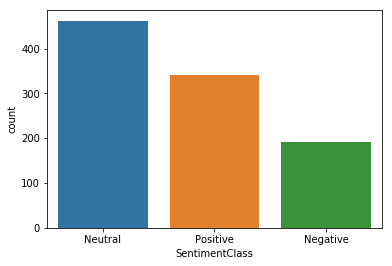

In [22]:
#What were the sentiments aroud the show?
sns.countplot(x='SentimentClass',data=data)

In [23]:
date_tweet_count=twdata['date'].value_counts()


In [24]:
def convert_index_column(df_tweet_count):
    index_list=np.array(df_tweet_count.index)
    tweets_list=[]
    for index,date_from_index  in enumerate (index_list):
        tweets_counts=df_tweet_count['date'][index]
        tweets_per_day={'date':date_from_index,'number_of_tweets':tweets_counts}
        tweets_list.append(tweets_per_day)
    return tweets_list

In [25]:
df_tweet_date_count=pd.DataFrame(data=date_tweet_count)
tweets_per_day=convert_index_column(df_tweet_date_count)
tweets_per_day_df=pd.DataFrame(tweets_per_day)


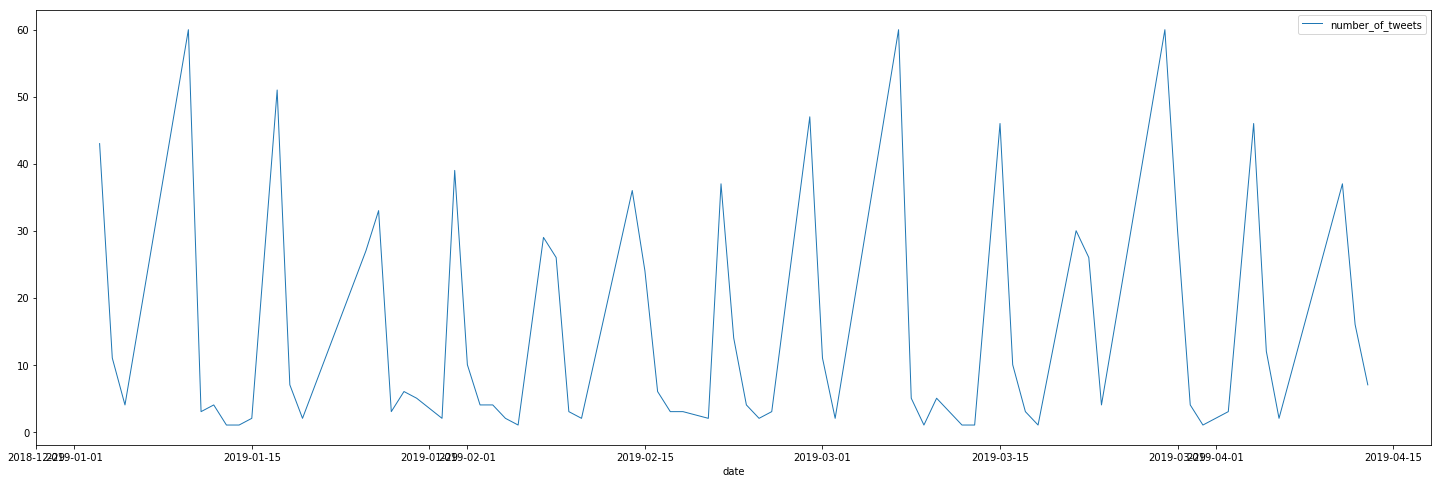

In [26]:
tweets_per_day_df.plot.line(x=tweets_per_day_df['date'],y='number_of_tweets',figsize=(25,8),lw=1)


In [27]:
hour_tweet_count=twdata['hour'].value_counts()
df_tweet_hour_count=pd.DataFrame(data=hour_tweet_count)

In [28]:
def convert_index_hour(df_tweet_count):
    index_list=np.array(df_tweet_count.index)
    tweets_list=[]
    for index,hour_from_index  in enumerate (index_list):
        tweets_counts=df_tweet_count['hour'][hour_from_index]
        hour=str(hour_from_index)+"hrs"
        tweets_per_hour={'hour':hour,'number_of_tweets':tweets_counts}
        tweets_list.append(tweets_per_hour)
    return tweets_list

In [29]:
tweets_per_hour=convert_index_hour(df_tweet_hour_count)
tweets_per_hour_df=pd.DataFrame(tweets_per_hour)
tweets_per_hour_df

,hour,number_of_tweets
0,20hrs,494
1,21hrs,94
2,16hrs,47
3,5hrs,41
4,6hrs,36
5,15hrs,31
6,17hrs,29
7,9hrs,28
8,22hrs,23
9,7hrs,21


In [2]:
#Hour with the most tweets?
g=sns.barplot(x='hour',y='number_of_tweets',data=tweets_per_hour_df)
for item in g.get_xticklabels():
    item.set_rotation(30)

NameError: name 'sns' is not defined